In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import edo
from edo.pdfs import Uniform

In [2]:
def sample_mean(df, p=0.2, num_samples=10):
    """ Find the mean of a sample from the given dataset. """

    means = []
    for _ in range(num_samples):
        mean = df.sample(frac=p).mean().abs().iloc[0]
        means.append(mean)

    return max(means)

In [3]:
Uniform.param_limits["bounds"] = [-1, 1]

pop, fit, all_pops, all_fits = edo.run_algorithm(
    fitness=sample_mean,
    size=100,
    row_limits=[5, 50],
    col_limits=[1, 1],
    pdfs=[Uniform],
    max_iter=100,
    best_prop=0.1,
    mutation_prob=0.005,
    seed=0,
)

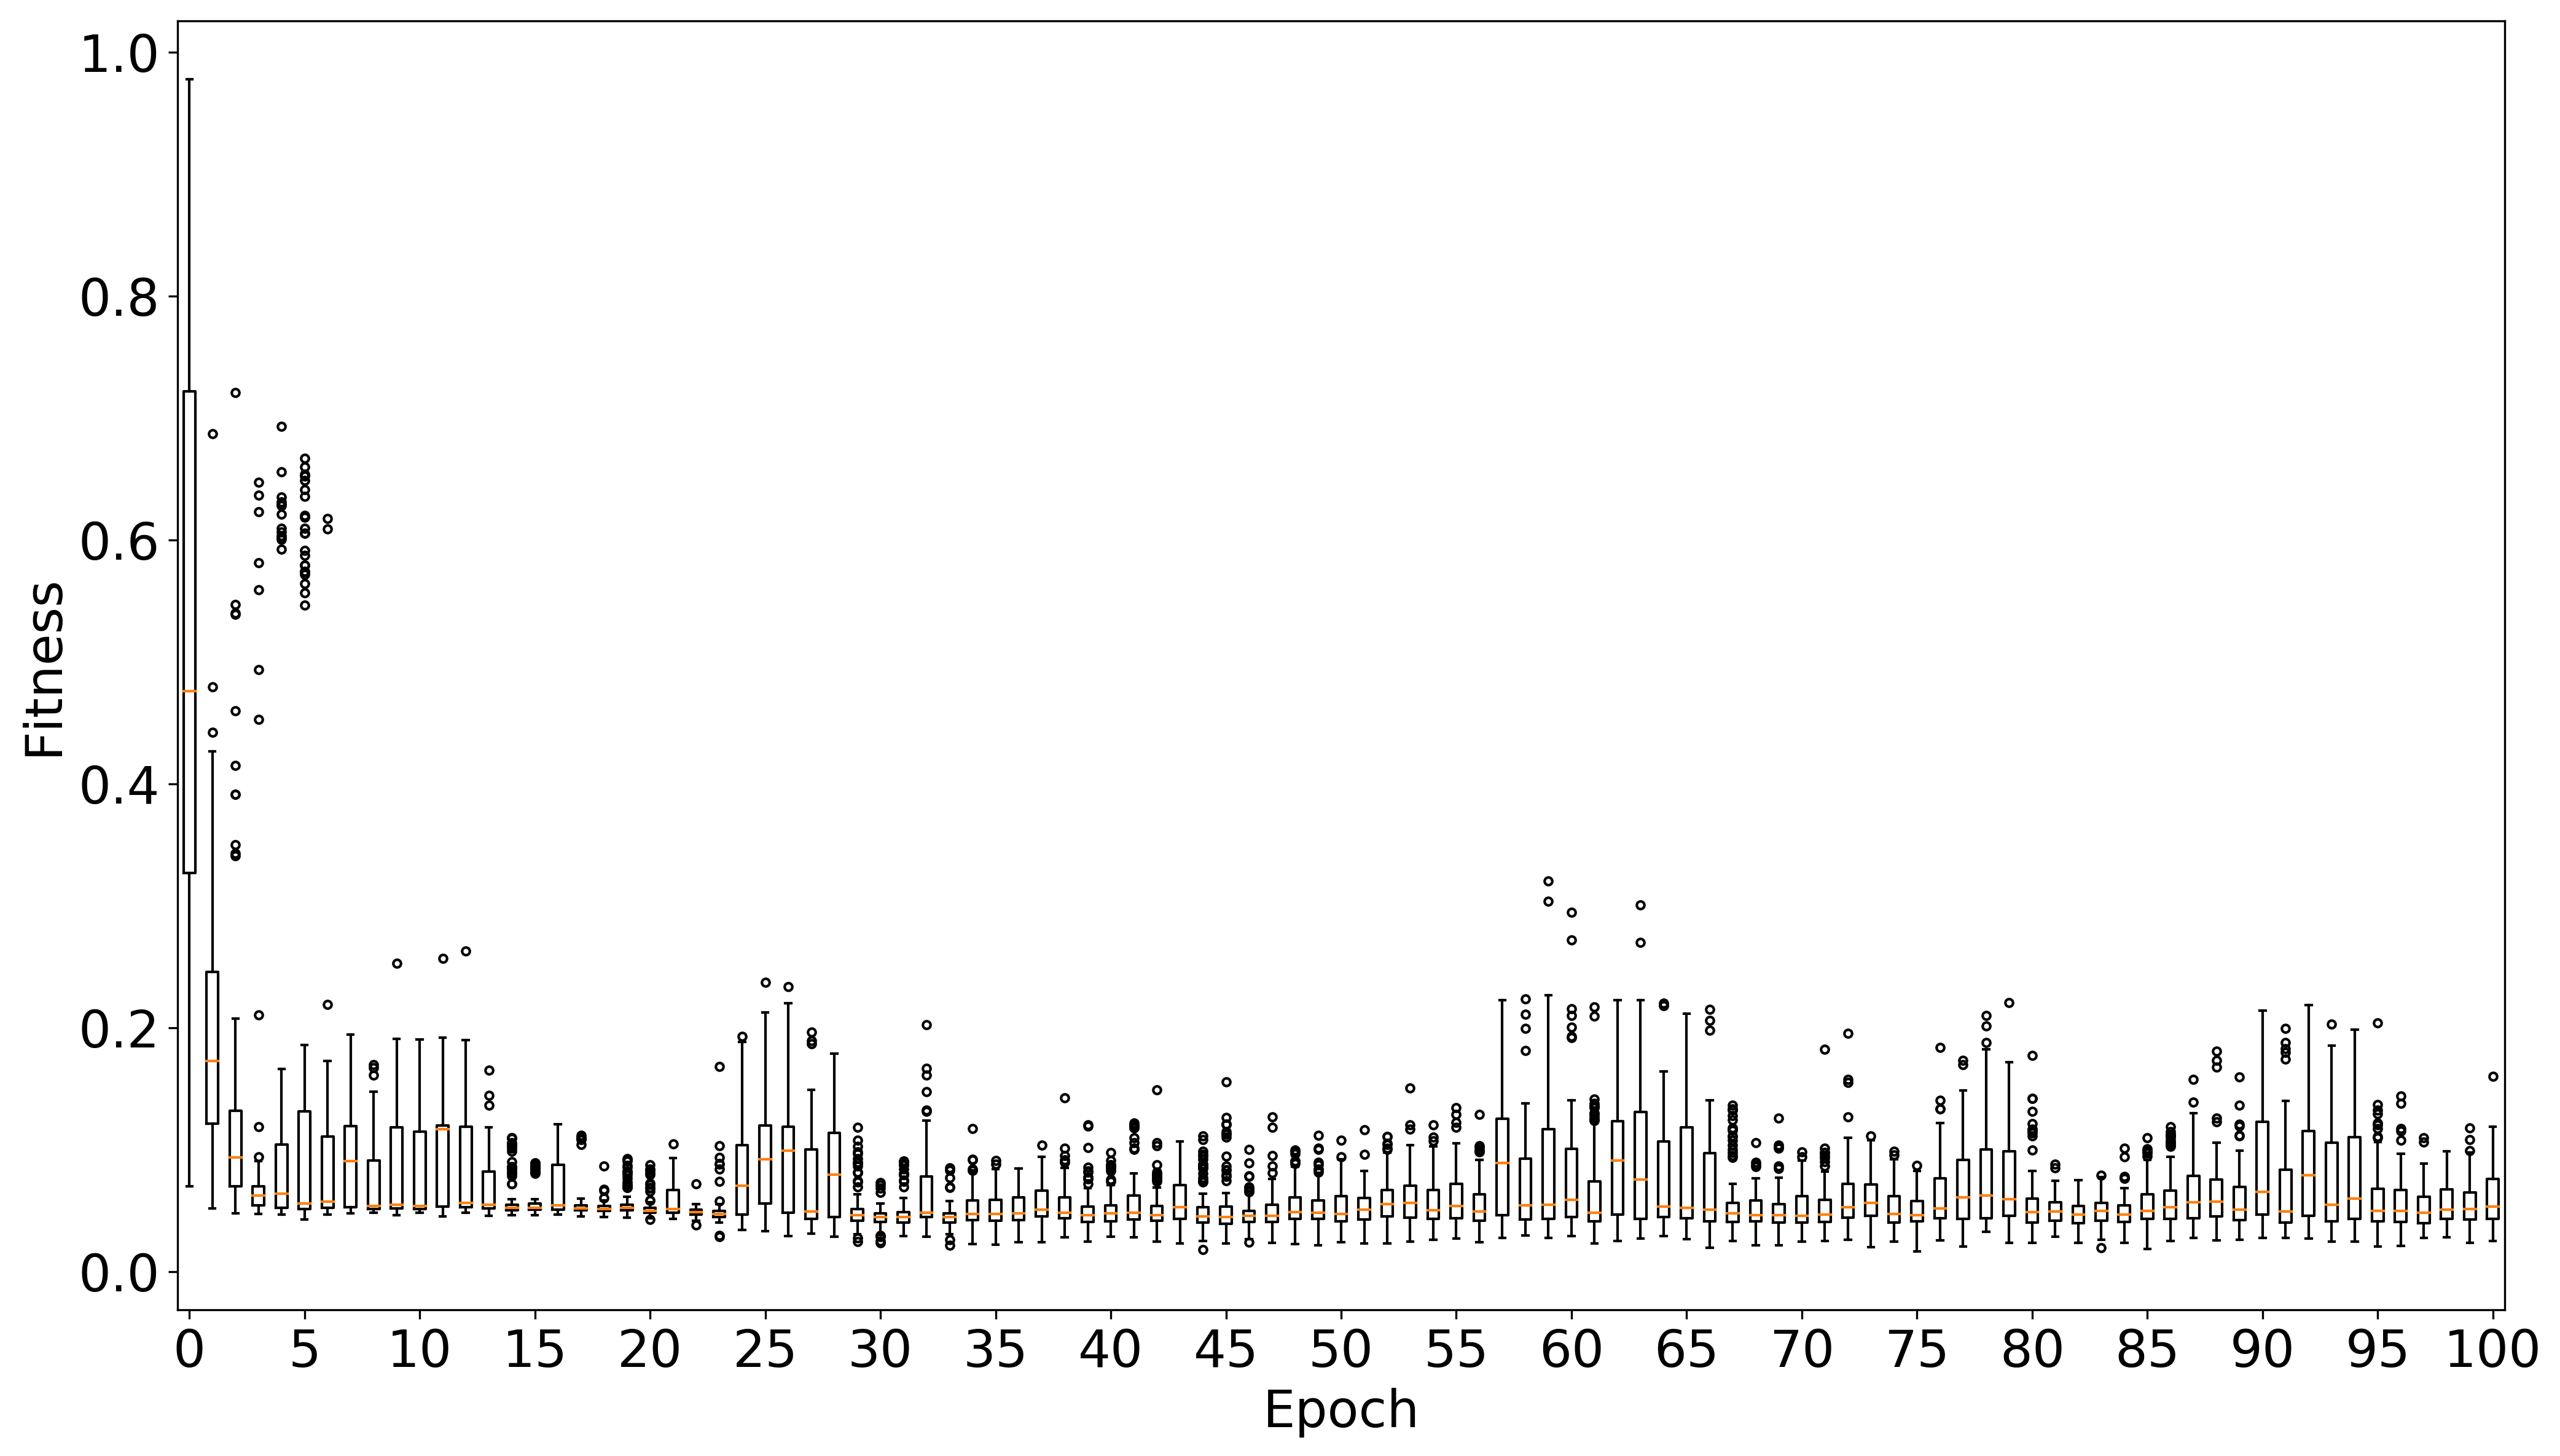

In [4]:
fig, ax = plt.subplots(figsize=(14, 8), dpi=300)
fs = 20

ax.boxplot(
    all_fits, positions=range(len(all_fits)), sym="."
)

ax.set_xlabel("Epoch", size=fs)
ax.set_ylabel(r"Fitness", size=fs)
ax.set_xticks(range(0, 101, 5))
ax.set_xticklabels(range(0, 101, 5))

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(fs)

plt.tight_layout()
plt.savefig("fitness.pdf", transparent=True)

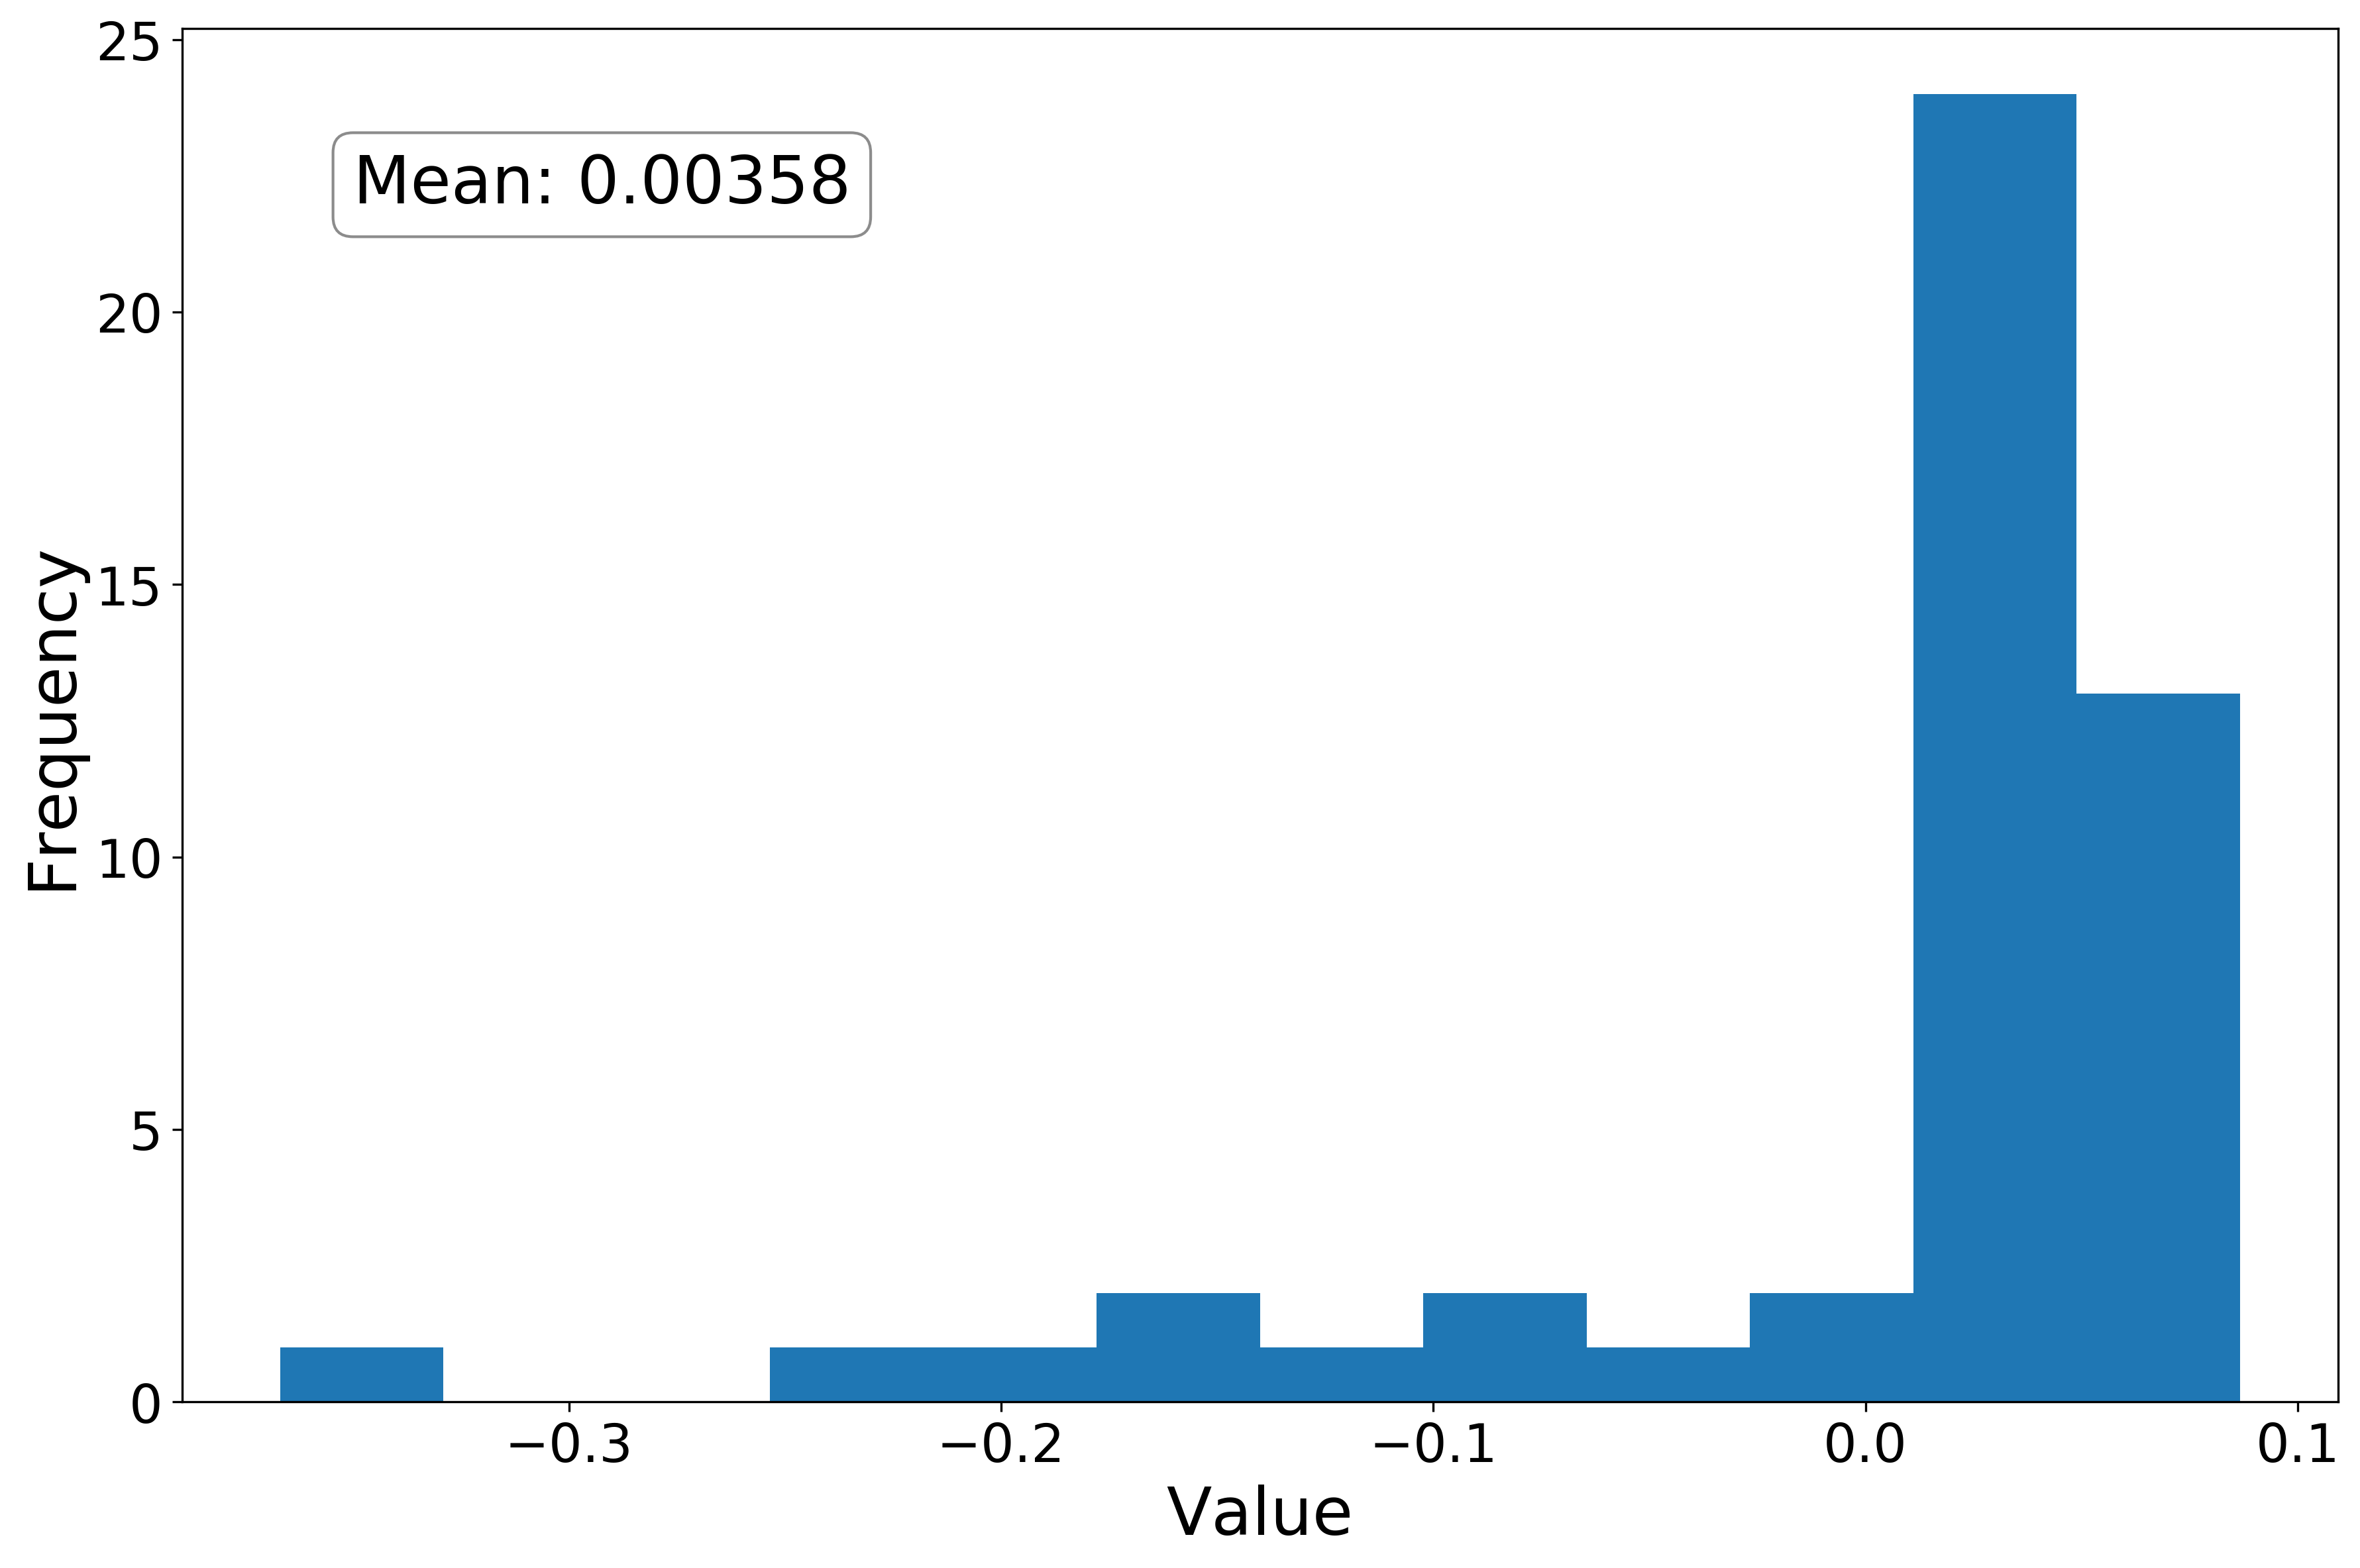

In [38]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
fs = 24

best = np.argmin(fit)
df = pop[best].dataframe

ax.hist(df[0], bins=12)

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
ax.text(-0.35, 22, s=f"Mean: {np.round(df[0].mean(), 5)}", fontdict={"fontsize": fs}, bbox=bbox_props)

ax.set_xlabel("Value", size=fs)
ax.set_ylabel("Frequency", size=fs)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(.8 * fs)

plt.tight_layout()
plt.savefig("sample_mean.pdf", transparent=True);